In [1]:
#Import Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load Dataset as train 
#Note: Load sheet 2 'Data'
df_train = pd.read_excel('Credit_DS_DATA_ONLY.xlsx')

In [3]:
print(df_train.head())

   Homeowner  Credit Score  Years of Credit History  Revolving Balance  \
0          1           725                       20              11320   
1          1           573                        9               7200   
2          1           677                       11              20000   
3          0           625                       15              12800   
4          0           527                       12               5700   

   Revolving Utilization  Decision  
0                   0.25         1  
1                   0.70         0  
2                   0.55         1  
3                   0.65         0  
4                   0.75         0  


In [4]:
#Cross Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [5]:
'''Now let's do Data Science

My Plan:
I plan to use several methods
Linear Regression (different forms)
Boosted Gradient
BayesianRidge

then simply stack these methods

'''
#Split dataframe into train and test
train, test = train_test_split(df_train, test_size=0.2)

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Decision.values
y_test = test.Decision.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Decision'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

train = all_data[:ntrain]
test = all_data[ntrain:]


all_data size is : (50, 5)


In [6]:
#DS libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [7]:
new_test = pd.read_excel('CREDIT APPROVAL DATASET ONLY_Test.xlsx')
new_test = new_test.drop('Decision', axis = 1)

In [8]:
train

,Homeowner,Credit Score,Years of Credit History,Revolving Balance,Revolving Utilization
0,0,763,2,11200,0.70
1,1,802,10,10500,0.05
2,0,625,15,12800,0.65
3,1,677,12,7600,0.09
4,1,725,20,11320,0.25
5,1,660,24,9200,0.35
6,0,620,3,37400,0.87
7,0,620,5,22800,0.62
8,1,774,13,6100,0.07
9,0,485,5,1000,0.80


In [9]:
'''
Let's build a first pass simple linear
regression like what we built in Excel Module 2

Let's use the log values to smooth it out 
'''
#show Linear Regression like the Excel First Pass
regr = LinearRegression()
regr.fit(train, y_train)

#Linear Reg prediction
'''Logs removed use np.expm1'''
y_tester = (new_test)
y_predict = regr.predict(new_test.values)
#y_predict = regr.predict(test.values)

score = rmsle_cv(regr)

#Coefficients
#print("Coefficients: \n", regr.coef_)
cdf = pd.DataFrame(regr.coef_, train.columns, columns = ["Coefficients"])

print(cdf)


                         Coefficients
Homeowner                    0.199451
Credit Score                 0.000154
Years of Credit History      0.006262
Revolving Balance            0.000004
Revolving Utilization       -1.229307


In [10]:
#Dataset setup to have predicted values in df
predicted_df = y_tester.copy(deep=True)
predicted_df['Decision'] = y_predict

In [11]:
print(predicted_df)

   Homeowner  Credit Score  Years of Credit History  Revolving Balance  \
0          1           700                        8              21000   
1          0           520                        1               4000   
2          1           650                       10               8500   
3          0           602                        7              16300   
4          0           549                        2               2500   
5          1           742                       15              16700   

   Revolving Utilization  Decision  
0                   0.15  0.958884  
1                   0.90 -0.306027  
2                   0.25  0.787894  
3                   0.70  0.042074  
4                   0.90 -0.301644  
5                   0.18  0.954117  


In [12]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [13]:
error_rate = []
# Might take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train,y_train)
    pred_i = knn.predict(test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

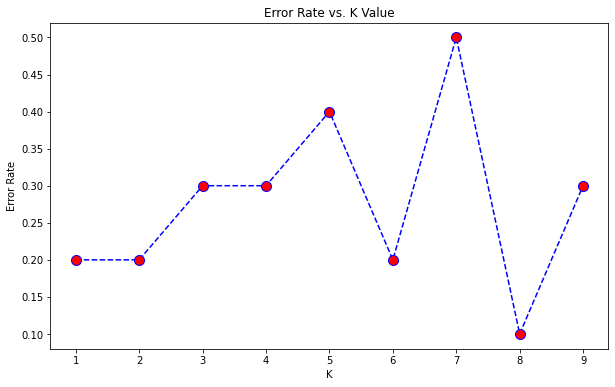

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train,y_train)
y_predict = knn.predict(y_tester)

In [24]:
#Dataset setup to have predicted values in df
predicted_df = y_tester.copy(deep=True)
predicted_df['Decision'] = y_predict

print(predicted_df)

   Homeowner  Credit Score  Years of Credit History  Revolving Balance  \
0          1           700                        8              21000   
1          0           520                        1               4000   
2          1           650                       10               8500   
3          0           602                        7              16300   
4          0           549                        2               2500   
5          1           742                       15              16700   

   Revolving Utilization  Decision  
0                   0.15         0  
1                   0.90         0  
2                   0.25         1  
3                   0.70         1  
4                   0.90         0  
5                   0.18         1  


In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train,y_train)
y_predict = knn.predict(y_tester)

In [18]:
#Dataset setup to have predicted values in df
predicted_df = y_tester.copy(deep=True)
predicted_df['Decision'] = y_predict

print(predicted_df)

   Homeowner  Credit Score  Years of Credit History  Revolving Balance  \
0          1           700                        8              21000   
1          0           520                        1               4000   
2          1           650                       10               8500   
3          0           602                        7              16300   
4          0           549                        2               2500   
5          1           742                       15              16700   

   Revolving Utilization  Decision  
0                   0.15         0  
1                   0.90         0  
2                   0.25         1  
3                   0.70         0  
4                   0.90         0  
5                   0.18         1  


In [19]:

error_rate.append(np.mean(y_predict!= y_test))

In [20]:
error_rate

[0.2, 0.2, 0.3, 0.3, 0.4, 0.2, 0.5, 0.1, 0.3, 1.0]